In [129]:
import sympy as sp
# from qiskit import QuantumCircuit
# start the pretty-printer to get nicely typeset math
from sympy.physics.quantum import TensorProduct

sp.init_printing()

In [130]:
#definition des états
ket0 = sp.Matrix([1,0])
ket1 = sp.Matrix([0,1])

α = sp.Symbol("α")
β = sp.Symbol("β")
ϕ = α * ket0 + β * ket1 # Matrix([α,β])


# Common states

## On one qubit
$$
|0\rangle = \begin{bmatrix}1 \\ 0\end{bmatrix}, \quad
|1\rangle = \begin{bmatrix}0 \\ 1\end{bmatrix}
$$
$$
|\psi\rangle = \alpha|0\rangle + \beta|1\rangle = \alpha\begin{bmatrix}1 \\ 0\end{bmatrix} + \beta\begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}\alpha \\ \beta\end{bmatrix}
$$
$$
|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle), \quad
|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
$$

## On two qubits


$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle), \quad
|\Phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)
$$

$$
|\Psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle), \quad
|\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)
$$


# Common operations

## On one qubit
$$
I = \begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}, \quad
X = \sigma_{x} = \begin{bmatrix}0 & 1 \\ 1 & 0\end{bmatrix}, \quad
Y = \begin{bmatrix}0 & -i \\ i & 0\end{bmatrix}, \quad
Z = \begin{bmatrix}1 & 0 \\ 0 & -1\end{bmatrix}
$$

$$
H = \frac{1}{\sqrt{2}} \begin{bmatrix}1 & 1 \\ 1 & -1\end{bmatrix}
$$

$$
S = \begin{bmatrix}1 & 0 \\ 0 & i\end{bmatrix}, \quad
T = \begin{bmatrix}1 & 0 \\ 0 & e^{i\pi/4}\end{bmatrix}
$$

## On two qubits

$$
\text{CNOT} =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}
$$


$$
R_y(\theta)=\begin{bmatrix}cos(\frac{\theta}{2}) & sin(\frac{\theta}{2}) \\ -sin(\frac{\theta}{2}) & -cos(\frac{\theta}{2})\end{bmatrix}\quad
$$
$$
R_z(\alpha)=\begin{bmatrix}e^{\frac{i\alpha}{2}} & 0 \\ 0 & e^{-\frac{iα}{2}}\end{bmatrix}\quad
$$
$$
Ph(\delta)=\begin{bmatrix}e^{i\delta} & 0 \\ 0 & e^{i\delta}\end{bmatrix}\quad
$$


In [131]:
# Operation on one Qubit
I=sp.eye(2)
π=sp.pi
X=sp.Matrix([[0,1], [1,0]]) #Pauli
σx=X
Y=sp.Matrix([[0,-sp.I], [sp.I,0]])
Z=sp.Matrix([[1,0], [0,-1]])

H=sp.Matrix([[1/sp.sqrt(2),1/sp.sqrt(2)], [1/sp.sqrt(2),-1/sp.sqrt(2)]])

S=sp.Matrix([[1,0], [0,-sp.I]])
T=sp.Matrix([[1,0], [0,sp.exp(-sp.I*π/4)]])


# rotation by theta around y
def Ry(θ):
    return sp.Matrix([[sp.cos(θ/2),sp.sin(θ/2)], [-sp.sin(θ/2),sp.cos(θ/2)]])

# rotation by alpha around z
def Rz(α):
    return sp.Matrix([[sp.exp(sp.I*α/2),0], [0,sp.exp(-sp.I*α/2)]]) 

# Phase Shift with resepct to delta
def Ph(δ):
    return sp.Matrix([[sp.exp(sp.I*δ),0], [0,sp.exp(sp.I*δ)]]) 

# Operation on two Qubits

SWAP = sp.Matrix ([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])
CNOT = TensorProduct(I,ket0*ket0.T) + TensorProduct(X, ket1*ket1.T) # second qubit is the control

In [132]:
# https://nbviewer.org/github/twistedhardware/mltutorial/blob/master/notebooks/jupyter/2.%20Markdown%20%26%20LaTeX.ipynb



In [133]:
θ = sp.Symbol("θ")
δ = sp.Symbol("δ")
W=sp.simplify(Ph(δ)*Rz(α)*Ry(θ)*Rz(β))
W

⎡  ⅈ⋅(α + β + 2⋅δ)           ⅈ⋅(α - β + 2⋅δ)        ⎤
⎢  ───────────────           ───────────────        ⎥
⎢         2           ⎛θ⎞           2           ⎛θ⎞ ⎥
⎢ ℯ               ⋅cos⎜─⎟   ℯ               ⋅sin⎜─⎟ ⎥
⎢                     ⎝2⎠                       ⎝2⎠ ⎥
⎢                                                   ⎥
⎢  ⅈ⋅(-α + β + 2⋅δ)          ⅈ⋅(-α - β + 2⋅δ)       ⎥
⎢  ────────────────          ────────────────       ⎥
⎢         2            ⎛θ⎞          2            ⎛θ⎞⎥
⎢-ℯ                ⋅sin⎜─⎟  ℯ                ⋅cos⎜─⎟⎥
⎣                      ⎝2⎠                       ⎝2⎠⎦

On définit:
- $A = R_z(\frac{\alpha}{2}).R_y(\frac{\theta}{2})$
- $B = R_y(-\frac{\theta}{2}).R_z(-\frac{\alpha+\beta}{2})$
- $C = R_z(\frac{\beta-\alpha}{2})$

In [134]:
A=Rz(α)*Ry(θ/2)
B=Ry(-θ/2)*Rz(-(α+β)/(2))
C=Rz((β-α)/2)
# sp.pprint(A,use_unicode=True)

In [135]:
# print(sp.latex(sp.Integral(sp.sqrt(1/α), α)))

On vérifie que $A.B.C = I$

In [136]:
I==sp.simplify(A*B*C)

True

On vérifie que $A.\sigma_x.B.\sigma_x.C = R_z(\alpha).Ry(\theta).R_z(\beta)$

In [137]:
sp.simplify(A*σx*B*σx*C)-sp.simplify(Rz(α)*Ry(θ)*Rz(β)) == sp.Matrix([[0,0], [0,0]])

True

# Controlled Gates

$ Ctrld(U) = |0\rangle\langle0| \otimes I + |1\rangle\langle1| \otimes U$

In [138]:
def Controlled(U):
    return TensorProduct(ket0*ket0.T, I) + TensorProduct(ket1*ket1.T, U)

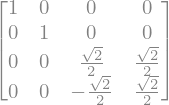

In [139]:
U=Ry(π/2)
TensorProduct(ket0*ket0.T, I) + TensorProduct(ket1*ket1.T, U)

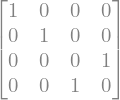

In [140]:
Controlled(X)

In [163]:
sp.simplify(Controlled(A*σx*B*σx*C)) == sp.simplify(TensorProduct(I,A)*Controlled(X)*TensorProduct(I,B)*Controlled(X)*TensorProduct(I,C))

True

In [165]:
Controlled(Ph(δ))

⎡1  0   0     0  ⎤
⎢                ⎥
⎢0  1   0     0  ⎥
⎢                ⎥
⎢       ⅈ⋅δ      ⎥
⎢0  0  ℯ      0  ⎥
⎢                ⎥
⎢             ⅈ⋅δ⎥
⎣0  0   0    ℯ   ⎦

In [166]:
E=Rz(-δ)*Ph(δ/2)
E

⎡1   0  ⎤
⎢       ⎥
⎢    ⅈ⋅δ⎥
⎣0  ℯ   ⎦

In [167]:
TensorProduct(E, I)

⎡1  0   0     0  ⎤
⎢                ⎥
⎢0  1   0     0  ⎥
⎢                ⎥
⎢       ⅈ⋅δ      ⎥
⎢0  0  ℯ      0  ⎥
⎢                ⎥
⎢             ⅈ⋅δ⎥
⎣0  0   0    ℯ   ⎦

In [168]:
Controlled(Ph(δ)) == TensorProduct(Rz(-δ)*Ph(δ/2), I)

True